5. Understanding "Second Hand Car Prediction Price" dataset by doing feature analysis. Data is available at:
https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction

In [1]:
import pandas as pd
df=pd.read_csv("/content/cars.csv")
# ***Head***
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [2]:
# ***Columns***
df.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [3]:
# **Describe**
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [4]:
# ***Shape***
df.shape

(100, 13)

In [5]:
# ***Isnull***
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [6]:
# **Dtype and Describe**
df['Price'].dtype
df['Price'].describe()

,Price
count,1.000000e+02
mean,1.574000e+06
std,1.000265e+06
min,4.500000e+05
25%,7.000000e+05
50%,1.300000e+06
75%,2.500000e+06
max,4.000000e+06


In [7]:
### **Identify target variable**
target = 'Power'
print(f"\nTarget variable: {target}")


Target variable: Power


In [8]:
## ***Identify target variable and find whether it is continuous or discrete***
if df[target].nunique() > 10: # This is an arbitrary threshold to distinguish between
    # continuous/discrete
    print("The target variable is continuous.")
else:
    print("The target variable is discrete.")

The target variable is continuous.


In [9]:
### ***Null check(imputation)***
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

print("\nNull values after imputation:")
print(df.isnull().sum())


Null values after imputation:
Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


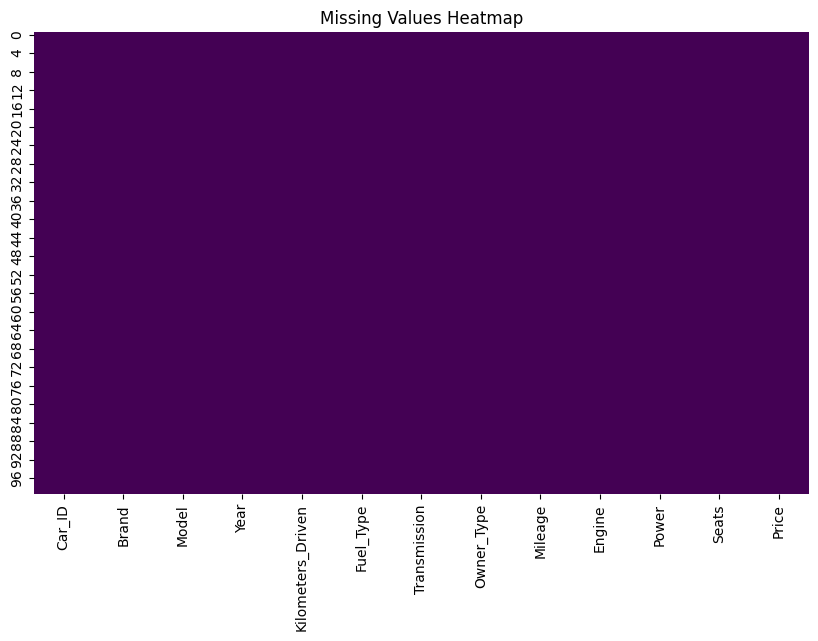

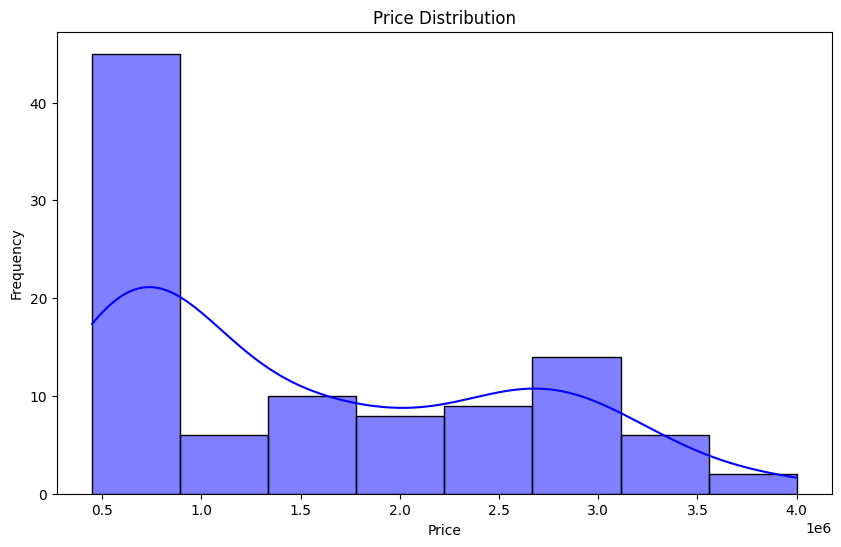

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the Null Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
# Visualizing the Distribution of 'Price' (Target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()